# Edge Detection 개요
### 1. Contour (외곽선 찾기)

### 2. 침식과 팽창

### 3. Canny Edge Detection

### 4. Hough

In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from PIL import ImageFont, ImageDraw, Image
%matplotlib inline

plt.rcParams["figure.figsize"] = (8,6)

In [3]:
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

## 1. contour 외곽선 찾기
### cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]]) → contours, hierarchy
Parameters:	
- **image** : 8-bit single-channel image. binary image.
- **mode** : contours를 찾는 방법
    - *cv2.RETR_EXTERNAL* : contours line중 가장 바깥쪽 Line만 찾음.
    - *cv2.RETR_LIST* : 모든 contours line을 찾지만, hierachy 관계를 구성하지 않음.
    - *cv2.RETR_CCOMP* : 모든 contours line을 찾으며, hieracy관계는 2단계로 구성함.
    - *cv2.RETR_TREE* : 모든 contours line을 찾으며, 모든 hieracy관계를 구성함.
- **method** : contours를 찾을 때 사용하는 근사치 방법
    - *cv2.CHAIN_APPROX_NONE* : 모든 contours point를 저장.
    - *cv2.CHAIN_APPROX_SIMPLE* : contours line을 그릴 수 있는 point 만 저장. (ex; 사각형이면 4개 point)
    - *cv2.CHAIN_APPROX_TC89_L1* : contours point를 찾는 algorithm
    - *cv2.CHAIN_APPROX_TC89_KCOS* : contours point를 찾는 algorithm
    
returns :
- contours : 각각의 point들의 list의 list형태. 예를 들어, 사각형은 하나의 contours line을 구성하기 때문에 len(contours) = 1. 값은 사각형의 꼭지점 좌표.
- hierarchy : contours line의 계층 구조([See this page](https://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html))

#### 예제 1. 직사각형 외곽선 찾기

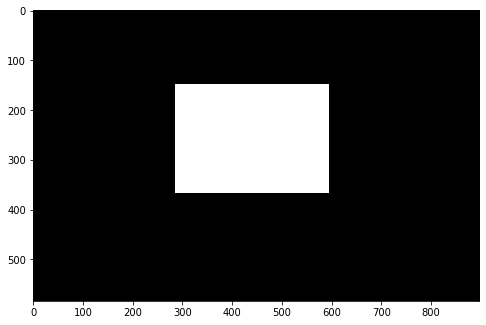

[array([[[285, 149]],

       [[285, 367]],

       [[593, 367]],

       [[593, 149]]], dtype=int32)]


In [6]:
img = cv2.imread("./datas/shape4.png", 0)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow("", binary)

# 외곽선 꼭지점 좌표값 구하기
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

#### 예제 2. 특이한 도형 외곽선 찾기
<strong> &nbsp;&nbsp; - 흰색을 기준으로 외곽선을 검출한다!!</strong>

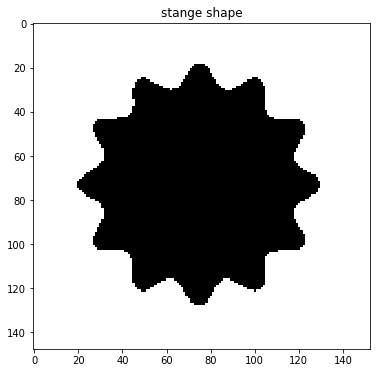

[array([[[  0,   0]],

       [[  0, 147]],

       [[152, 147]],

       [[152,   0]]], dtype=int32)]


In [7]:
img = cv2.imread("./datas/shape5.PNG", 0)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

imshow("stange shape", binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#흰색을 기준으로 하여 찾았기 때문에 plt 그래프의 모서리 4개를 잡은 것을 알수 있다.
print(contours)



#### 위의 문제(흰색기준으로 찾기에 별모양을 찾는것 아닌 외곽 꼭지점만 찾음)로 인해 아래는 반대로 값 검출!, 무수히 많은 점들이 나옴을 알 수 있다

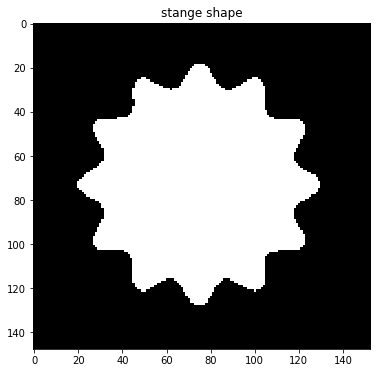

[array([[[ 73,  19]],

       [[ 70,  22]],

       [[ 70,  23]],

       [[ 69,  24]],

       [[ 69,  25]],

       [[ 67,  27]],

       [[ 67,  28]],

       [[ 65,  30]],

       [[ 63,  30]],

       [[ 62,  31]],

       [[ 61,  30]],

       [[ 59,  30]],

       [[ 58,  29]],

       [[ 57,  29]],

       [[ 56,  28]],

       [[ 55,  28]],

       [[ 54,  27]],

       [[ 53,  27]],

       [[ 52,  26]],

       [[ 51,  26]],

       [[ 50,  25]],

       [[ 49,  25]],

       [[ 48,  26]],

       [[ 47,  26]],

       [[ 46,  27]],

       [[ 46,  29]],

       [[ 45,  30]],

       [[ 45,  34]],

       [[ 46,  35]],

       [[ 46,  37]],

       [[ 45,  38]],

       [[ 45,  40]],

       [[ 42,  43]],

       [[ 38,  43]],

       [[ 37,  44]],

       [[ 29,  44]],

       [[ 27,  46]],

       [[ 27,  49]],

       [[ 28,  50]],

       [[ 28,  51]],

       [[ 29,  52]],

       [[ 29,  53]],

       [[ 31,  55]],

       [[ 31,  56]],

       [[ 32,  57]],

       [[

In [8]:
img = cv2.imread("./datas/shape5.PNG", 0)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 -binary

imshow("stange shape", binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

#### 예제 3. 외곽선에 파란색 테두리 색칠하기

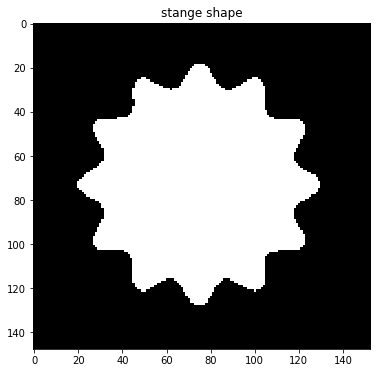

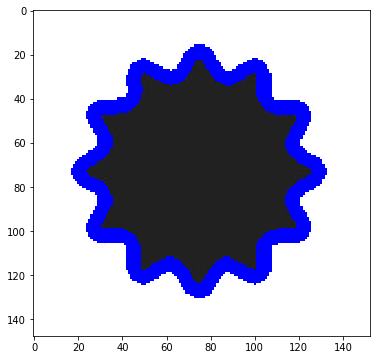

In [9]:
img = cv2.imread("./datas/shape5.PNG", 0)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary

imshow("stange shape", binary)

contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img = cv2.imread("./datas/shape5.png")
cv2.drawContours(img, contours, -1, (255, 0, 0), 5)
imshow("", img)

#### 예제 4. contour 도형 개수 파악 및 첫번째 좌표 찍기

#### 참고사항 : 옵션이 external이라면 contours는 흰색의 외곽선 결과를 찾는다!!

count = 6
count : 240, perimeter : 513.7056245803833, approx : 3
count : 300, perimeter : 515.9310202598572, approx : 5
count : 226, perimeter : 531.8721435070038, approx : 8
count : 4, perimeter : 672.0, approx : 4
count : 298, perimeter : 616.7178171873093, approx : 3
count : 56, perimeter : 493.0336227416992, approx : 4


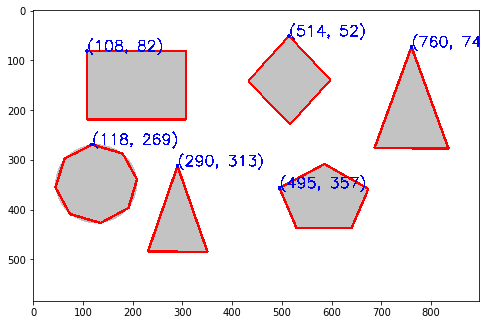

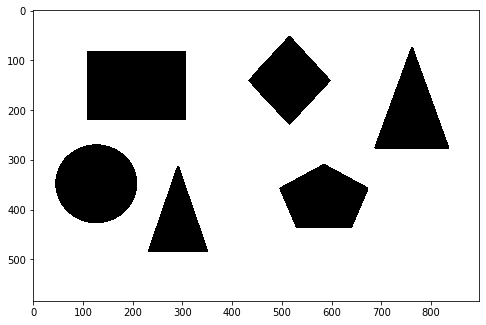

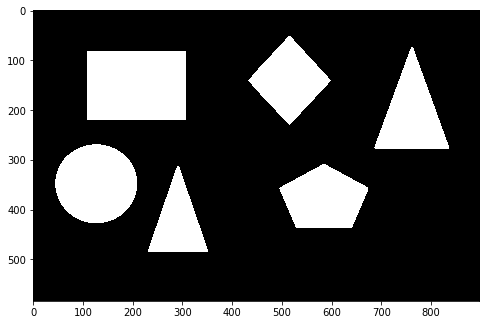

In [10]:
img = cv2.imread("./datas/shape3.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"count = {len(contours)}")

for con in contours:
    # 도형의 길이
    peri = cv2.arcLength(con, True)
    # 점의 개수
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    print(f"count : {len(con)}, perimeter : {peri}, approx : {len(approx)}")
    # 도형의 첫번째 꼭지점
    point = tuple(approx[0][0][:])
    
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 3)
    cv2.circle(img, point, 4, (255,0,0), -1)
    cv2.putText(img, f"{point}", point, cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,0), 2)
    
imshow("", img)
imshow("", gray)
imshow("", binary)

In [11]:
print("shape : ", con.shape)
print("첫번째 도형의 모든 점들의 좌표 : ", con)
x = con[0][0][0]
y = con[0][0][1]
print("x좌표 : ", x)
print("y좌표 : ", y)

shape :  (56, 1, 2)
첫번째 도형의 모든 점들의 좌표 :  [[[514  52]]

 [[507  59]]

 [[507  60]]

 [[493  74]]

 [[493  75]]

 [[480  88]]

 [[480  89]]

 [[466 103]]

 [[466 104]]

 [[453 117]]

 [[453 118]]

 [[439 132]]

 [[439 133]]

 [[432 140]]

 [[432 142]]

 [[440 150]]

 [[440 151]]

 [[456 167]]

 [[456 168]]

 [[472 184]]

 [[472 185]]

 [[488 201]]

 [[488 202]]

 [[505 219]]

 [[505 220]]

 [[514 229]]

 [[516 229]]

 [[525 220]]

 [[525 219]]

 [[538 206]]

 [[538 205]]

 [[551 192]]

 [[551 191]]

 [[565 177]]

 [[565 176]]

 [[578 163]]

 [[578 162]]

 [[591 149]]

 [[591 148]]

 [[597 142]]

 [[597 140]]

 [[591 134]]

 [[591 133]]

 [[580 122]]

 [[580 121]]

 [[569 110]]

 [[569 109]]

 [[557  97]]

 [[557  96]]

 [[546  85]]

 [[546  84]]

 [[534  72]]

 [[534  71]]

 [[523  60]]

 [[523  59]]

 [[516  52]]]
x좌표 :  514
y좌표 :  52


<strong>
    contours를 그리는 데 있어 imread에 0을 입력해서 흑백으로 읽으면 contours가 제대로 표현이 안되기에 BGR to Gray를 사용해야한다?
</strong>

- peri : 513.7056245803833, approx : [[[290 313]]

 [[231 484]]

 [[350 485]]]
- count = 240, length = 513.7056245803833, approx : 3

- [array([[[290, 313]],

       [[289, 314]],

       [[289, 316]],

       [[288, 317]],

       [[288, 319]],

       [[287, 320]],

       [[287, 321]],

       [[286, 322]],

       [[286, 324]],

       [[285, 325]],

       [[285, 327]],

       [[284, 328]],

       [[284, 330]],

       [[283, 331]],

       [[283, 333]],

       [[282, 334]],

       [[282, 336]],

       [[281, 337]],

       [[281, 339]],

       [[280, 340]],

       [[280, 342]],

       [[279, 343]],

       [[279, 345]],

       [[278, 346]],

       [[278, 348]],

       [[277, 349]],

       [[277, 350]],

       [[276, 351]],

       [[276, 353]],

       [[275, 354]],

       [[275, 356]],

       [[274, 357]],

       [[274, 359]],

       [[273, 360]],

       [[273, 362]],

       [[272, 363]],

       [[272, 365]],

       [[271, 366]],

       [[271, 368]],

     

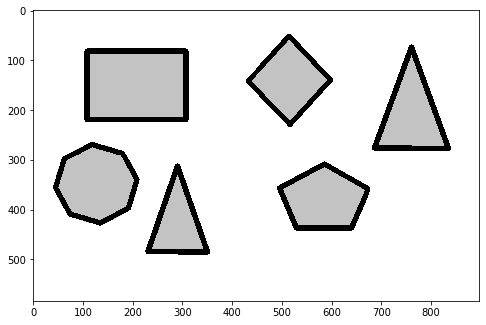

In [12]:
img = cv2.imread("./datas/shape3.png", cv2.IMREAD_GRAYSCALE)

_, binary = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for con in contours:
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    print(f"- peri : {peri}, approx : {approx}")
    print(f"- count = {len(con)}, length = {peri}, approx : {len(approx)}\n")
    print("-", [con])
    print("-", [approx])
    p = tuple(con[0][0])
    
    cv2.drawContours(img, [approx], -1, (0,0,255), 10)
    
imshow("", img)

- peri : 513.7056245803833, approx : [[[290 313]]

 [[231 484]]

 [[350 485]]]
- count = 240, length = 513.7056245803833, approx : 3

- [array([[[290, 313]],

       [[289, 314]],

       [[289, 316]],

       [[288, 317]],

       [[288, 319]],

       [[287, 320]],

       [[287, 321]],

       [[286, 322]],

       [[286, 324]],

       [[285, 325]],

       [[285, 327]],

       [[284, 328]],

       [[284, 330]],

       [[283, 331]],

       [[283, 333]],

       [[282, 334]],

       [[282, 336]],

       [[281, 337]],

       [[281, 339]],

       [[280, 340]],

       [[280, 342]],

       [[279, 343]],

       [[279, 345]],

       [[278, 346]],

       [[278, 348]],

       [[277, 349]],

       [[277, 350]],

       [[276, 351]],

       [[276, 353]],

       [[275, 354]],

       [[275, 356]],

       [[274, 357]],

       [[274, 359]],

       [[273, 360]],

       [[273, 362]],

       [[272, 363]],

       [[272, 365]],

       [[271, 366]],

       [[271, 368]],

     

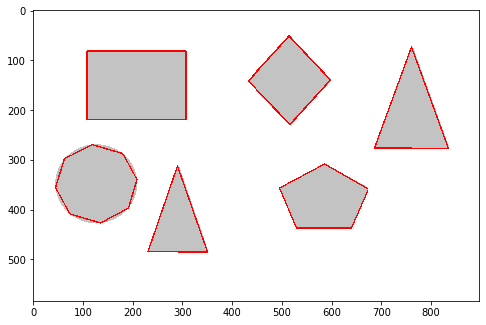

In [13]:
img = cv2.imread("./datas/shape3.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
binary = 255 - binary
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for con in contours:
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02*peri, True)
    print(f"- peri : {peri}, approx : {approx}")
    print(f"- count = {len(con)}, length = {peri}, approx : {len(approx)}\n")
    print("-", [con])
    print("-", [approx])
    p = tuple(con[0][0])
    
    cv2.drawContours(img, [approx], -1, (0,0,255), 2)
    
imshow("", img)

#### 예제 4. 원카드 모양 contour

count = 4
count = 246 lenth = 489.6955177783966, apporx=4
count = 247 lenth = 686.6072119474411, apporx=16
count = 322 lenth = 709.9554046392441, apporx=27
count = 227 lenth = 654.5483376979828, apporx=16


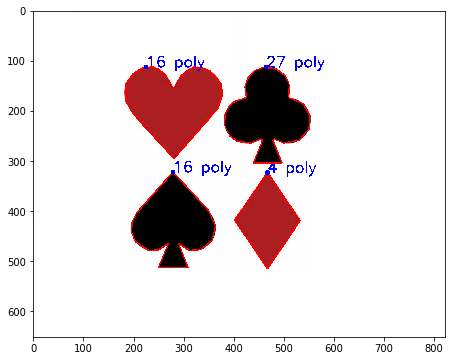

In [14]:
#원을 검출할 때 무수히 많은 점들로 이루어진 다각형으로 생각하고 찾는다.

img = cv2.imread("./datas/card.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray,0, 255,
                          cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 -mask
contours, _ = cv2.findContours(mask,
                              cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"count = {len(contours)}")
# 첫번째 contour 찾아 가져옴
con = contours[0] # 외곽 정보들 모두 찾음 따라서 approximation 만탖음 갑자기 변하는 기울기들을 찾는다.

for con in contours:
    peri = cv2.arcLength(con, True) #contour의 길이를 구하는 함수
    approx = cv2.approxPolyDP(con, 0.005*peri, True) # True는 폐곡선을 곡선으로 본다. 길이의 2%정도의 단위의 변화가 생겼을때
    
    print(f"count = {len(con)} lenth = {peri}, apporx={len(approx)}")
    p =tuple(con[0][0]) 
    cv2.putText(img, f"{len(approx)} poly", p,
               cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255,0,0),2)
    cv2.drawContours(img, [approx], -1, (0, 0, 255), 2) #contour 개별시 리스트로 넣어야함
    cv2.circle(img, p, 5, (255,0,0), -1)# -1을 주면 안을 채우겠다.

imshow("", img)
    


## 2. 침식과 팽창

> <strong>
    1. Erosion : 바이너리 이미지에서 흰색 오브젝트의 외곽 픽셀을 0(검정색)으로 만든다.<br>
    2. Dilation : 바이너리 이미지에서 희색 오브젝트의 외각 픽셀 주변에 1(흰색)을 추가한다.<br>
    3. Opening : Erosion 연산 후 Dilation 연산을 수행, 이미지 상의 노이즈(작은 흰색 물체)를 제거, 노이즈를 없애기 위해 사용한 Erosion에 의해서 작아졌던 오브젝트에 Dilation을 적용하면 오브젝트가 원래 크기로 돌아온다.<br>
    4. Closing : Dilation 연산 후 Erosion 연산 수행, 흰색 오브젝트에 있는 작은 검은색 구멍들을 메우는데 사용한다.
   </strong>

[See this page for the details](https://opencv-python.readthedocs.io/en/latest/doc/12.imageMorphological/imageMorphological.html)

### cv2.morphologyEx(src, op, kernel[, dst[, anchor[, iterations[, borderType[, borderValue]]]]]) → dst


Parameters:	
- **src** : 이미지. 채널 수는 아무 숫자나 가능. Depth는 CV_8U, CV_16U, CV_16S, CV_32F or CV_64F 중 하나여야 함.
- **op** : morphological operation 타입
    - *MORPH_ERODE* : 침식 
    - *MORPH_DILATE* : 팽창
    - *MORPH_OPEN* : 침식 후 팽창 an opening operation
    - *MORPH_CLOSE* : 팽창 후 침식 a closing operation
    - *MORPH_GRADIENT* : a morphological gradient. Dilation과 erosion의 차이.
    - *MORPH_TOPHAT* : “top hat”. Opeining과 원본 이미지의 차이
    - *MORPH_BLACKHAT* : “black hat”. Closing과 원본 이미지의 차이
- **kernel** : structuring element. cv2.getStructuringElement() 함수로 만들 수 있음.
- **anchor** : structuring element(kernel)의 중심. default (-1,-1)로 중심점.(안쓰면 생략)
- **iterations** : erosion and dilation 적용 반복 횟수
-----------
(잘 안쓰는 Parameters)
- **borderType** : Pixel extrapolation method. See borderInterpolate for details.
- **borderValue** : Border value in case of a constant border. The default value has a special meaning.

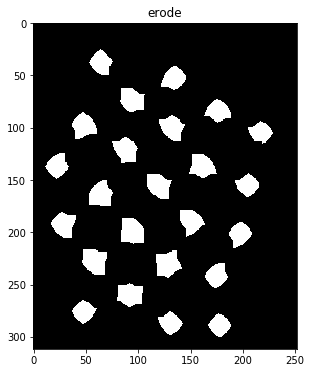

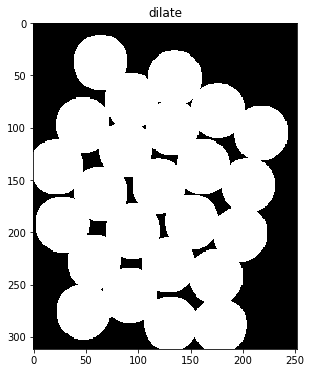

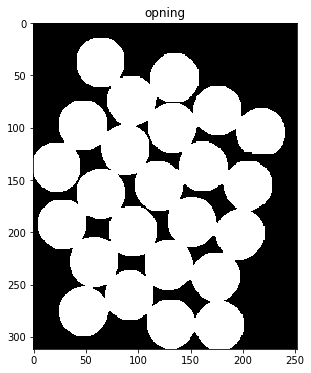

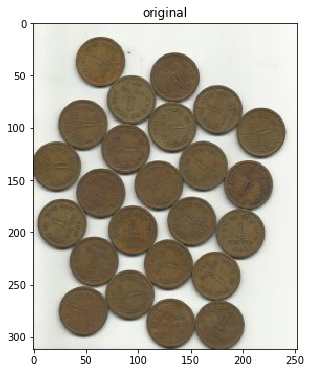

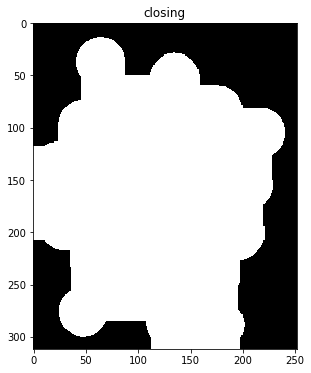

In [15]:
img = cv2.imread("./datas/water_coins.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
binary = 255 - binary
kernel = np.ones((5, 5), np.uint8)

erode = cv2.erode(binary, kernel, iterations=5)
imshow("erode", erode)

dilate = cv2.dilate(binary, kernel, iterations=1)
imshow("dilate", dilate)

kernel = np.ones((11, 11), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
imshow("opning", opening)
imshow("original", img)

kernel = np.ones((21, 21), np.uint8)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
imshow("closing", closing)

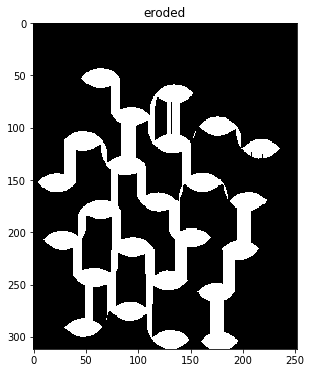

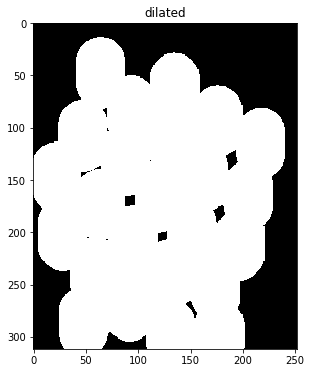

In [16]:
enroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3,3), iterations=30)
imshow("eroded", enroded)

dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3,3), iterations=20)
imshow("dilated", dilated)

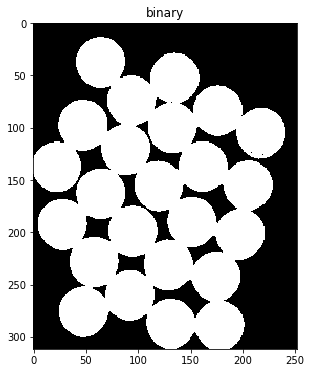

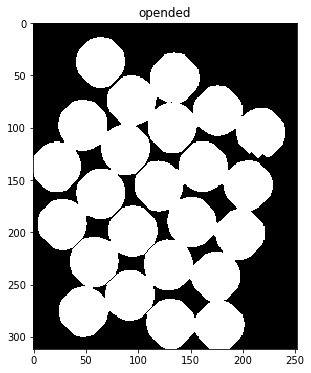

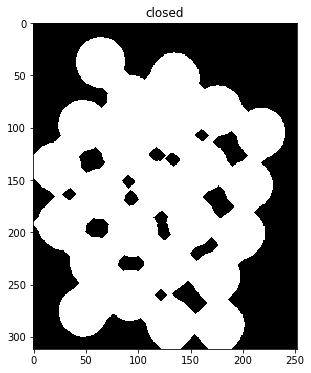

In [17]:
img = cv2.imread("./datas/water_coins.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

#침식 후 팽창
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=10)

#팽창 후 침식
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), iterations=5)

imshow("binary", binary)
imshow("opended", opened)
imshow("closed",closed)

## blur 이후 [adaptivethreshold결과 VS 팽창 후 침식(closed)]

blur = (1, 1) & (3, 3)


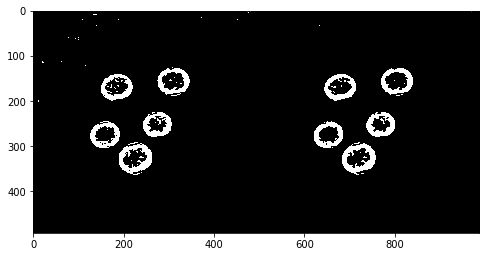

blur = (5, 5) & (7, 7)


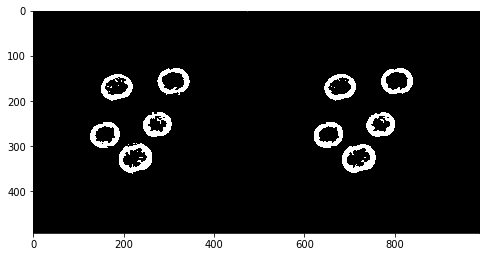

blur = (9, 9) & (11, 11)


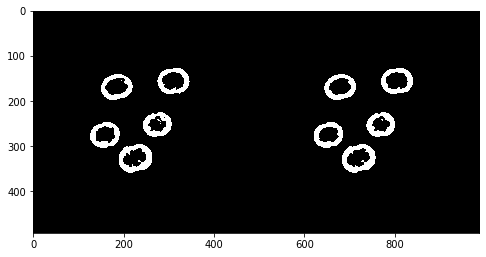

blur = (13, 13) & (15, 15)


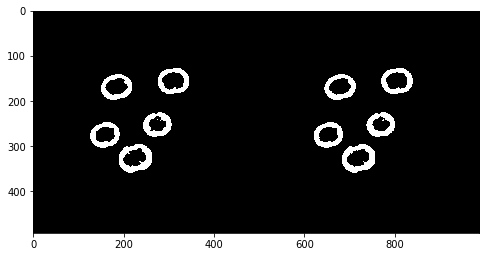

blur = (17, 17) & (19, 19)


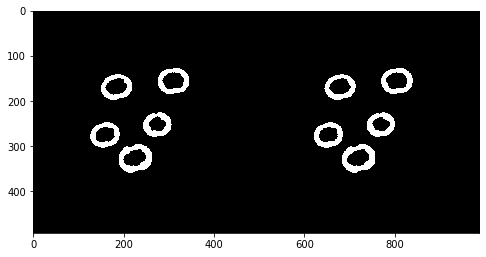

blur = (21, 21) & (23, 23)


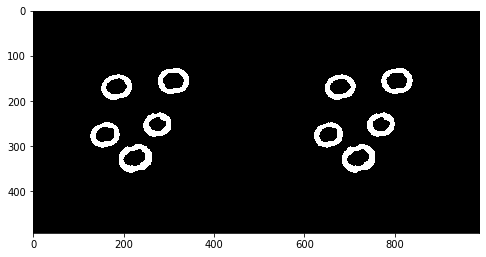

blur = (25, 25) & (27, 27)


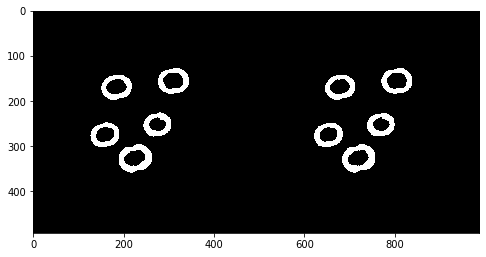

blur = (29, 29) & (31, 31)


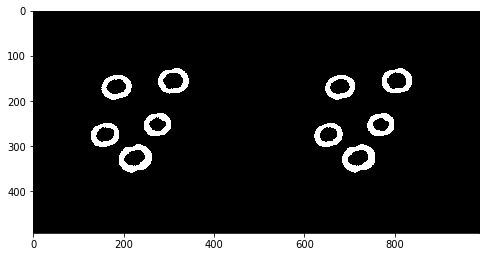

blur = (33, 33) & (35, 35)


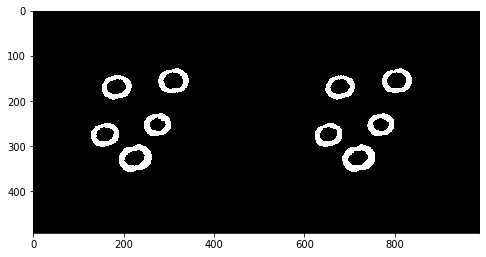

blur = (37, 37) & (39, 39)


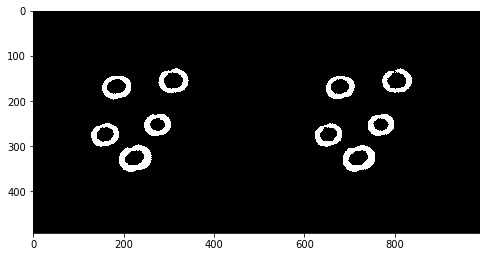

blur = (41, 41) & (43, 43)


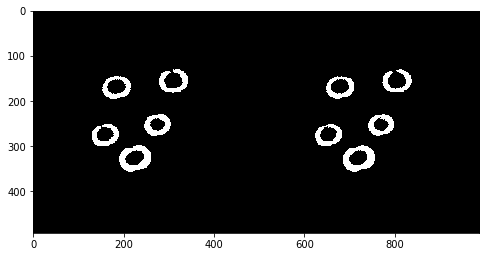

blur = (45, 45) & (47, 47)


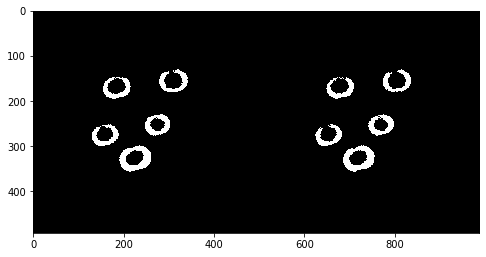

blur = (49, 49) & (51, 51)


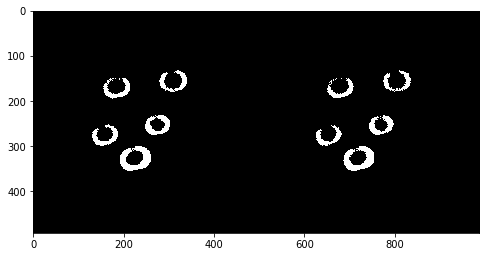

blur = (53, 53) & (55, 55)


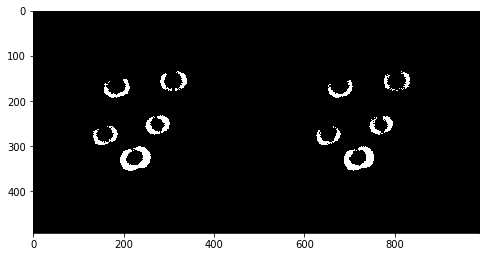

blur = (57, 57) & (59, 59)


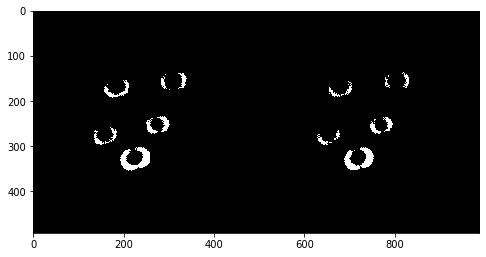

blur = (61, 61) & (63, 63)


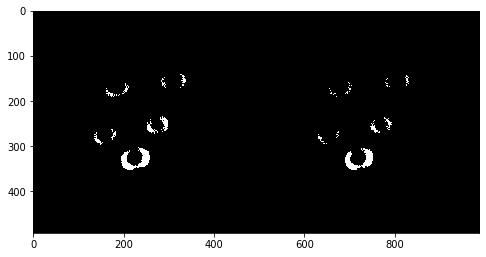

blur = (65, 65) & (67, 67)


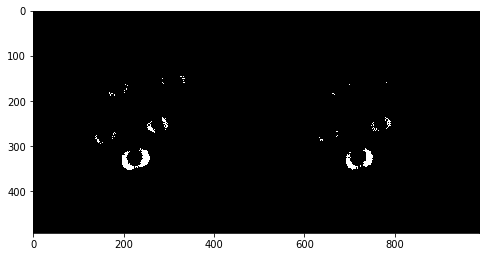

blur = (69, 69) & (71, 71)


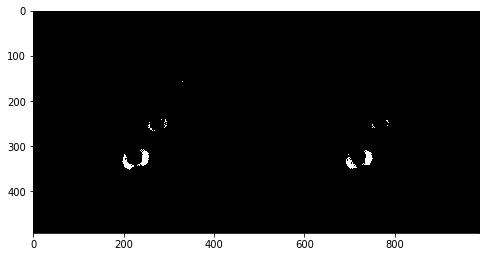

blur = (73, 73) & (75, 75)


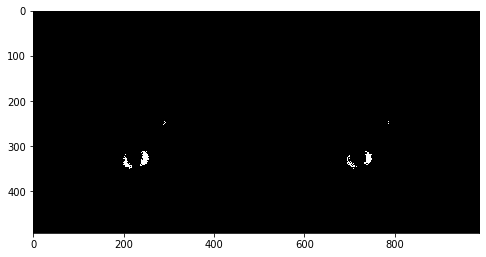

blur = (77, 77) & (79, 79)


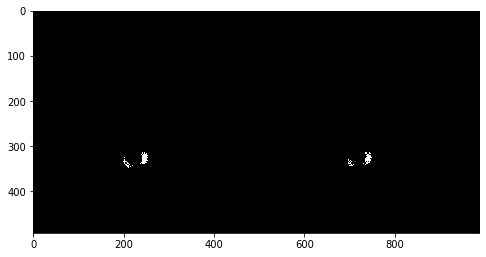

blur = (81, 81) & (83, 83)


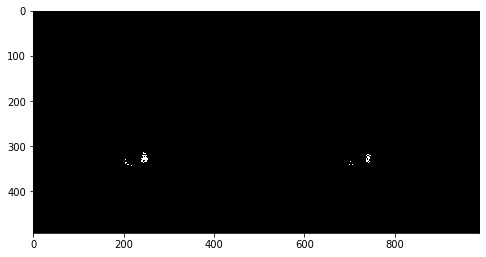

blur = (85, 85) & (87, 87)


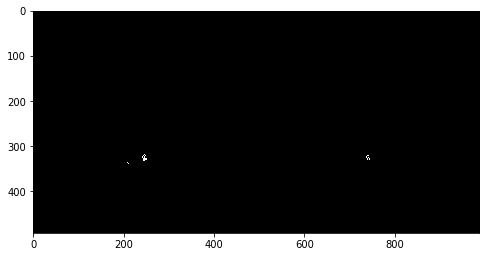

blur = (89, 89) & (91, 91)


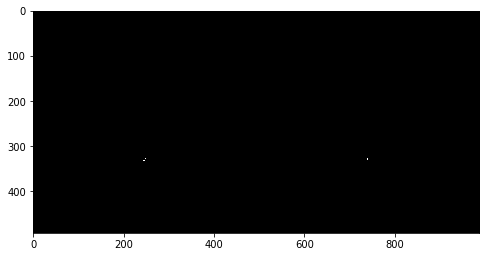

blur = (93, 93) & (95, 95)


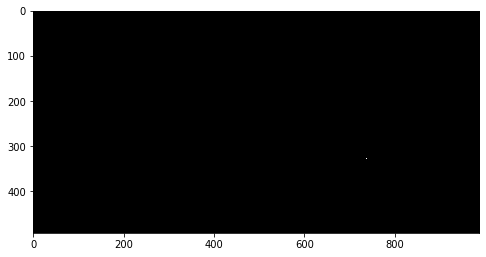

blur = (97, 97) & (99, 99)


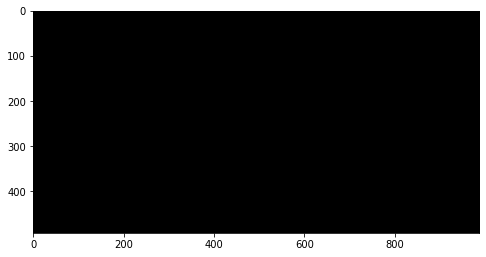

In [18]:
# blur 후 adaptivethreshold 적용

frame = cv2.imread("./datas/coin.png")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

for i in range(1,101, 4):
    print(f"blur = {(i,i)} & {(i+2, i+2)}")
    gray_blur = cv2.GaussianBlur(gray, (i,i), 0)
    gray_blur2 = cv2.GaussianBlur(gray, (i+2,i+2), 0)
    thresh_ad1 = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임
    thresh_ad2 = cv2.adaptiveThreshold(gray_blur2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임

    imshow("", np.hstack([thresh_ad1, thresh_ad2]))

In [19]:
# 팽창 후 침식(closed)
gray_blur_3 = cv2.GaussianBlur(gray, (3,3), 0)
thresh_3 = cv2.adaptiveThreshold(gray_blur_3, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 45,6)   # THRESH_BINARY_INV에서 INV는 255-binary한 것임
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh_3, cv2.MORPH_CLOSE, kernel, iterations=5)

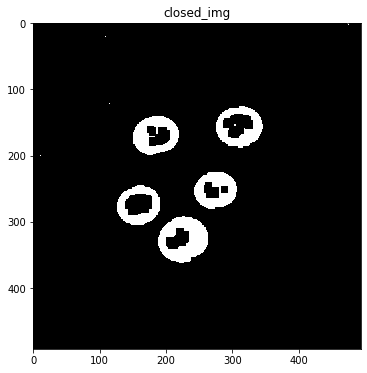

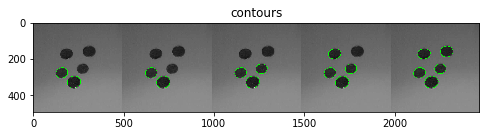

length of contours = 11
the number of closed curves = 5


In [20]:
# Gray로 바꾸고 Blur처리 해서 adaptivethreshold 적용하고 컨투어를 찾음
closed_img = closing.copy()   
imshow("closed_img", closed_img)


closed_contours,_ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀
i = 0
roi = frame.copy()
for cnt in closed_contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:           # cv.ellipse는 적어도 5개의 점이 필요함
        continue
    
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    if i == 0:
        draw = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께
        i += 1
    else:
        new_draw = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께
        draw = np.hstack([draw, new_draw])
        i += 1


imshow("contours", draw)

    
print(f"length of contours = {len(closed_contours)}") # 원래 contours 안에 있는 contour 개수들
print(f"the number of closed curves = {i}" )


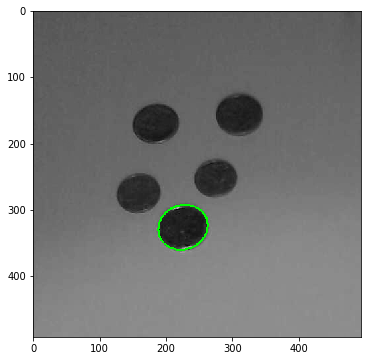

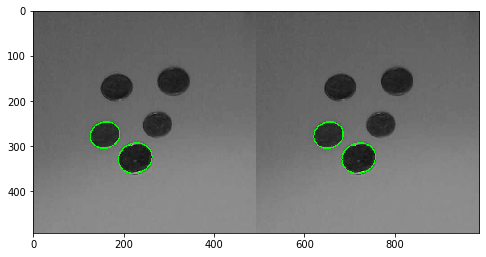

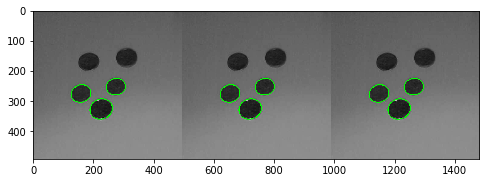

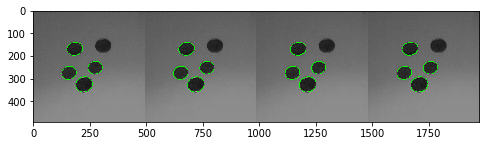

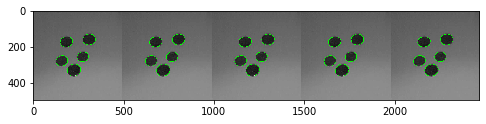

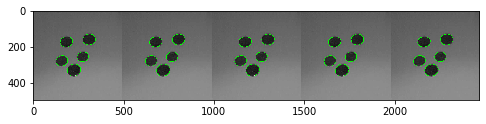

In [21]:
# 위에꺼보다 훨씬 간단한 코드
# Gray로 바꾸고 Blur처리 해서 adaptivethreshold 적용하고 컨투어를 찾음
closed_img = closing.copy()   
# imshow("closed_img", closed_img)


closed_contours,_ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀

imgs = []
roi = frame.copy()

for cnt in closed_contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:           # cv.ellipse는 적어도 5개의 점이 필요함
        continue
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    draw1 = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께

    imgs.append(draw1)
    plt.imshow(np.hstack(imgs), cmap='gray')
    plt.show()
    
plt.imshow(np.hstack(imgs), cmap='gray')

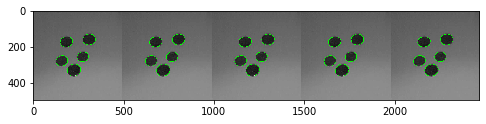

In [22]:
# 위에꺼보다 훨씬 간단한 코드
# Gray로 바꾸고 Blur처리 해서 adaptivethreshold 적용하고 컨투어를 찾음
closed_img = closing.copy()   
# imshow("closed_img", closed_img)


closed_contours,_ = cv2.findContours(closed_img, cv2.RETR_EXTERNAL,
                             cv2.CHAIN_APPROX_SIMPLE)       # 여기서 cont_img라는 카피본을 쓰는 이유는 findContours 함수가 적용 이후에
                                                            # 원본이 바뀌기 때문에(inplace=True 같은 느낌) 카피본을 씀

imgs = []
roi = frame.copy()
for cnt in closed_contours:
    area = cv2.contourArea(cnt)
    if area < 2000 or area > 4000:
        continue
    if len(cnt) < 5:           # cv.ellipse는 적어도 5개의 점이 필요함
        continue
#     roi = frame.copy()
    ellipse = cv2.fitEllipse(cnt)  # 타원을 만들어주는 함수
    draw1 = cv2.ellipse(roi, ellipse, (0,255,0), 2)   # 타원을 그리는 함수  2: 타원의 두께
    imgs.append(draw1)

plt.imshow(np.hstack(imgs), cmap='gray')

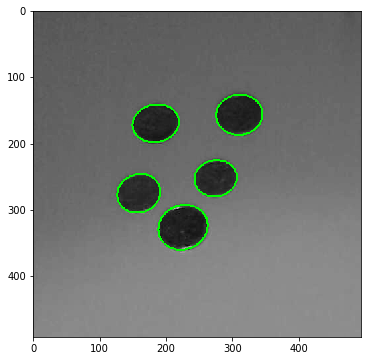

In [23]:
imshow("", draw1)

## 3. Canny Edge Detection

#### 예제 1. 책 찾기

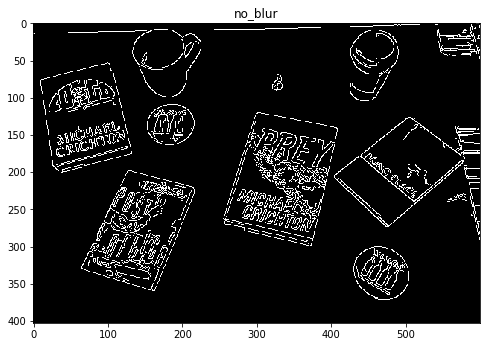

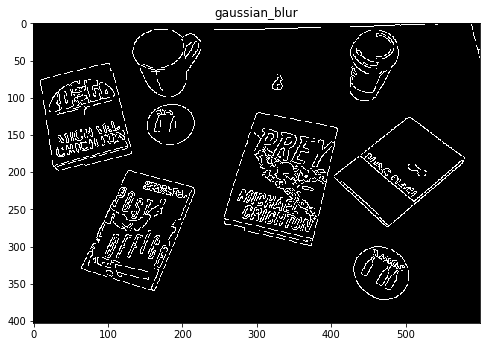

In [24]:
image = cv2.imread("./datas/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gassian_blur = cv2.GaussianBlur(gray, (3, 3), 0)


# cv2.Canny(***, minVal, maxVal)
# minVal보다 작으면 엣지 아니라고 판단
# maxVal보다 크면 확실한 엣지
# 그 사이는 판단함
edged1 = cv2.Canny(gray, 10, 250) # Canny : 외곽선 정보를 알려주는 함수(edge 추출 방법)
edged2 = cv2.Canny(gassian_blur, 10, 250) 

imshow('no_blur', edged1)
imshow('gaussian_blur', edged2)

#### 참고사항 : 책 외곽선 찾기

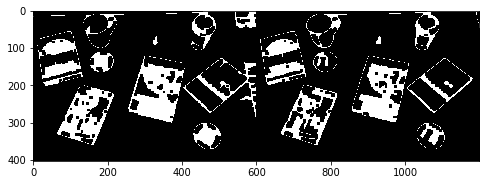

In [25]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed1 = cv2.morphologyEx(edged1, cv2.MORPH_CLOSE, kernel)
closed2 = cv2.morphologyEx(edged2, cv2.MORPH_CLOSE, kernel)

imshow("", np.hstack([closed1, closed2]))

I found 3 books in that image


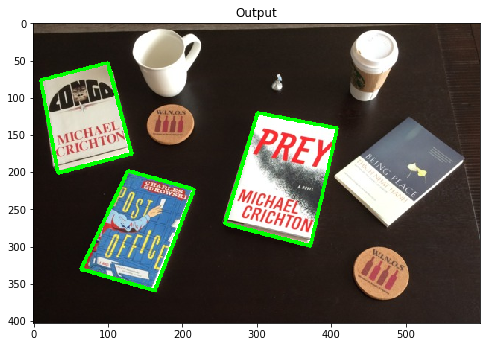

In [26]:
# 여기서는 closed1으로 해봄
cnts, _ = cv2.findContours(closed1.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

# cv2.drawContours(image, cnts, -1, (0,0,255), 1)
# cv2.imwrite("output3.png")

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

I found 4 books in that image


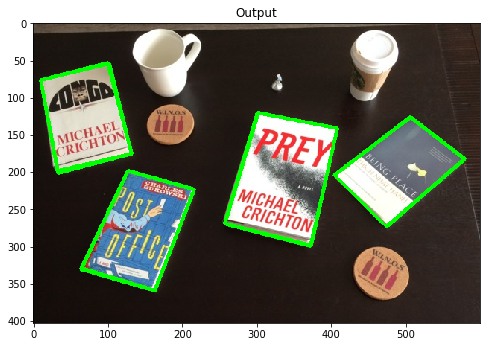

In [27]:
# 여기서는 closed2으로 해봄
cnts, _ = cv2.findContours(closed2.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

# cv2.drawContours(image, cnts, -1, (0,0,255), 1)
# cv2.imwrite("output3.png")

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [30]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

## 4. 호그를 통한 물체 검출

### 예제1. 바둑돌 찾기

In [28]:
img = cv2.imread('./datas/stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]


[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]
[(255, 2164), (0, 972)]
[(0, 2865), (255, 499)]
[(255, 2166), (0, 970)]
[(255, 2362), (0, 1002)]
[(255, 2255), (0, 1109)]
[(255, 2121), (0, 1015)]
[(255, 2258), (0, 1106)]
[(0, 2869), (255, 267)]
[(0, 2749), (255, 387)]
[(255, 2366), (0, 998)]
[(0, 2893), (255, 243)]
[(0, 3025), (255, 339)]
[(0, 2881), (255, 255)]
[(0, 2914), (255, 222)]
[(255, 1962), (0, 954)]
[(255, 2255), (0, 1109)]
[(0, 2808), (255, 328)]
[(0, 3038), (255, 326)]


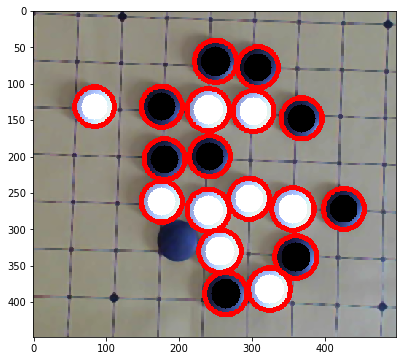

In [31]:
circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y), int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

#### 예제2. 바둑돌2

[[[208.5 135.5  26.8]
  [385.5 322.5  26.8]
  [439.5 316.5  27. ]
  [382.5  82.5  27.1]
  [513.5 123.5  26.8]
  [378.5 135.5  26.8]
  [504.5 202.5  26.4]
  [318.5 314.5  27.1]
  [314.5 382.5  27. ]
  [259.5 391.5  29.3]
  [320.5 436.5  25.8]
  [447.5 249.5  27.1]
  [447.5 377.5  27.1]
  [198.5  52.5  27.1]
  [431.5 137.5  26.7]
  [500.5 449.5  26.8]
  [196.5 254.5  27.1]
  [259.5 245.5  28.8]
  [196.5 328.5  27.2]
  [440.5 195.5  27.1]
  [391.5 262.5  29.3]
  [204.5 191.5  27.1]
  [255.5 451.5  29.4]
  [505.5 324.5  28.6]
  [140.5 137.5  30.1]
  [322.5 134.5  28.8]
  [387.5 385.5  25.7]
  [331.5 260.5  28.3]
  [250.5 317.5  29.1]
  [386.5 199.5  28. ]
  [386.5 447.5  30.3]
  [198.5 385.5  27.1]
  [330.5  76.5  29.3]
  [263.5  72.5  25.2]
  [314.5 205.5  28. ]
  [265.5 176.5  27.1]
  [439.5  73.5  25.2]]]
[[[208 136  27]
  [386 322  27]
  [440 316  27]
  [382  82  27]
  [514 124  27]
  [378 136  27]
  [504 202  26]
  [318 314  27]
  [314 382  27]
  [260 392  29]
  [320 436  26]
  [448 2

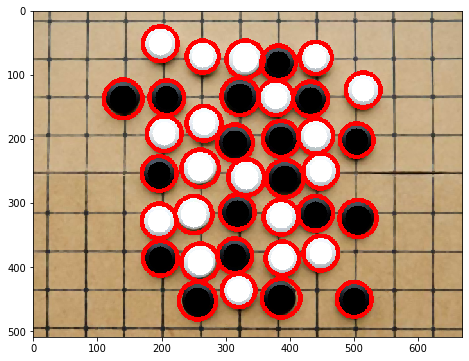

In [33]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('./datas/badook01.png')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                           1, 20, param1=100, param2=30, 
                           minRadius=10, maxRadius=50)

print(circles)


circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)

#### 예제3. 동전

[[[275.5 255.5  32.3]
  [162.5 274.5  29.2]
  [231.5 324.5  31.9]
  [313.5 156.5  31.9]
  [191.5 169.5  27.5]]]
[[[276 256  32]
  [162 274  29]
  [232 324  32]
  [314 156  32]
  [192 170  28]]]


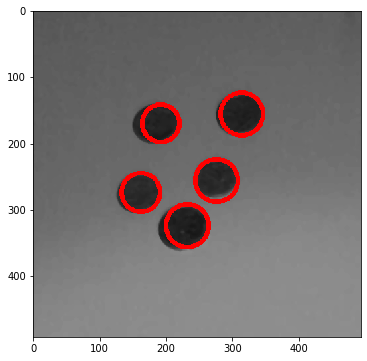

In [35]:
img = cv2.imread('./datas/coin.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
#     crop_img = img[y - r:y + r, x - r:x + r]    
#     txt, threshold = detect_weiqi(crop_img)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

#### 예제4 동전2

[[[ 47.5 276.5  23.9]
  [ 63.5  37.5  23.9]
  [ 47.5  97.5  24. ]
  [216.5 105.5  23.9]
  [176.5  84.5  23.8]
  [161.5 137.5  24.5]
  [ 27.5 192.5  23.8]
  [ 22.5 137.5  23.8]
  [204.5 155.5  23.5]
  [177.5 289.5  24.3]
  [134.5  52.5  23.2]
  [196.5 201.5  24.3]
  [173.5 242.5  24.6]
  [ 94.5 198.5  24. ]
  [131.5 288.5  23.2]
  [151.5 191.5  23.5]
  [ 63.5 163.5  24. ]]]
[[[ 48 276  24]
  [ 64  38  24]
  [ 48  98  24]
  [216 106  24]
  [176  84  24]
  [162 138  24]
  [ 28 192  24]
  [ 22 138  24]
  [204 156  24]
  [178 290  24]
  [134  52  23]
  [196 202  24]
  [174 242  25]
  [ 94 198  24]
  [132 288  23]
  [152 192  24]
  [ 64 164  24]]]


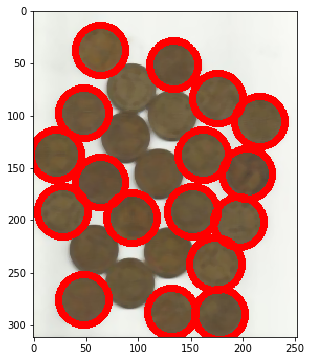

In [36]:
img = cv2.imread('./datas/water_coins.jpg')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# HoughCircles : 
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20,
                           param1=100, param2=30,
                           minRadius=10, maxRadius=50)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨 (edge의 문턱값)
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨 (값이 크면 진짜 원만 검출함)

print(circles)

circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
#     crop_img = img[y - r:y + r, x - r:x + r]    
#     txt, threshold = detect_weiqi(crop_img)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)